In [2]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
% matplotlib inline




UsageError: Line magic function `%` not found.


## A melody based similarity algorithm
This algorithm calculates the similarity of two melodies based on
two fundamental features: **pitch** and **duration**

#### This method separates the features of the melody (pitch and duration)

In [3]:
def pitch_note_split(melody):
    melody = np.array(melody).astype("float")
    durations = melody % 5

    melody = (melody - durations) / 5
    durations = 4 / 2 ** durations
    return melody, durations

#### Transform pitch relative to the average pitch

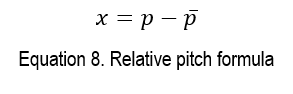

In [4]:
Image("images/relative_pitch_formula.png")

In [5]:
def transform_relative_pitch(melody):
    average_pitch = np.average(melody)
    melody = melody - average_pitch
    return melody

#### Gets the relationship of contiguous notes

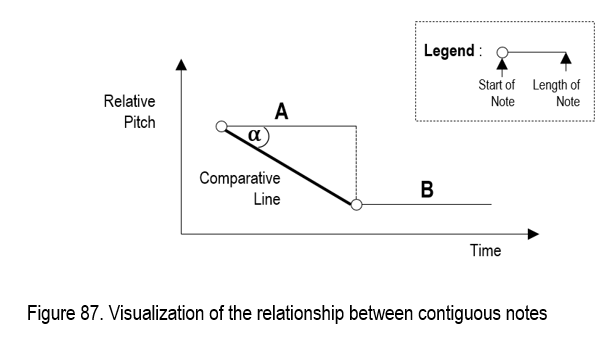

In [6]:
Image("images/note_relationship_visual.png")

Comparative Line is the distance between the beginning of notes A and B in terms of the duration of note A and
the distance between the relative pitch values of notes A and B.

The relationship of contiguous notes is represented as the inclination of the comparative line with respect to
the line representing note A

The inclination of the comparative line is calculated with the ff equation:

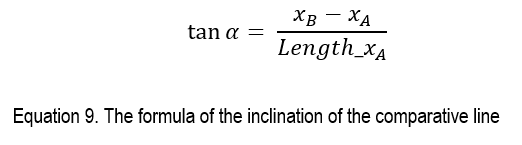

In [7]:
Image("images/comparative_line_inclination_formula.png")

In [8]:
def relationship_comparative_line(melody, durations):
    relationship = (melody[1:] - melody[:-1]) / durations[:-1]
    return relationship

#### Setting the Limit values

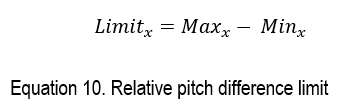

In [9]:
Image("images/relative_pitch_diff_limit_formula.png")

In [10]:
def pitch_difference_limit(relative_melody_1, relative_melody_2):
    """
    LIMIT_x = Max_x - Min_x
    Limit_x : The limit value for the relative pitch difference value
    Max_x : The maximum relative pitch value
    Min_x : The minimum relative pitch value
    Max_x = MAX(Max_x1, Max_x2)
    Minx = MIN(Min_x1, Min_x2)
    Max_x1, Max_x2 : Maximum relative pitch values of melody 1 and melody 2, respectively
    Min_x1, Min_x2 : Minimum relative pitch values of melody 1 and melody 2, respectively
    :param relative_melody_1: main relatively pitched comparative unit (preset)
    :param relative_melody_2: secondary relatively pitched comparative unit (melody to be checked)
    :return: maximum limit of pitch difference
    """

    min_x = min(min(relative_melody_1), min(relative_melody_2))
    max_x = max(max(relative_melody_1), max(relative_melody_2))
    limit = max_x - min_x
    return limit

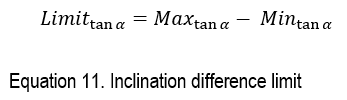

In [11]:
Image("images/inclination_diff_limit_formula.png")

In [12]:
def inclination_difference_limit(inclination_1, inclination_2):
    """
    Limit_tan(α) = Max_tan(α) – Min_tan(α)
    Limit_tan(α) : The limit value for the inclination
    difference value
    Max_tan(α) : The maximum inclination value
    Min_tan(α) : The minimum inclination value
    Max_tan(α) = MAX(Max_tan(α1), Max_tan(α2))
    Min_tan(α) = MIN(Min_tan(a1), Min_tan(a2))
    Max_tan(α1), Max_tan(α2) : Maximum inclination values of melody 1 and melody 2, respectively
    Min_tan(a1), Min_tan(a2): Minimum inclination values of melody 1 and melody 2, respectively

    :param inclination_1: inclination values of melody 1
    :param inclination_2: inclination values of melody 2
    :return: limit of inclination difference
    """

    min_x = min(min(inclination_1), min(inclination_2))
    max_x = max(max(inclination_1), max(inclination_2))
    limit = max_x - min_x
    return limit


#### Calculating similarity values

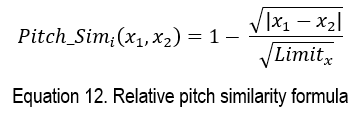

In [13]:
Image("images/relative_pitch_similarity_formula.png")

In [14]:
def pitch_similarity(x1, x2, pitch_diff_lim):
    """
    Formula: 1 -  | x1 = x2 | / Limit_x

    :param x1: relative pitch values of the preset
    :param x2: relative pitch values of the melody being compared
    :param pitch_diff_lim: maximum limit of pitch difference
    :return: pitch similarity score
    """
    return 1 - abs(x1 - x2) ** 0.5 / pitch_diff_lim ** 0.5

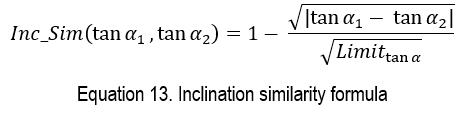

In [15]:
Image("images/inclination_similarity_formula.png")

In [16]:
def inclination_similarity(inclination_1, inclination_2, inclination_diff_lim):
    """
    Formula: 1 - | tan(a1) - tan(a2) | / Limit_tan(a)
    :param inclination_1: inclination values of the preset
    :param inclination_2: inclination values of the melody to be compared
    :param inclination_diff_lim: maximum limit of inclination difference
    :return: inclination similarity score
    """
    return 1 - abs(inclination_1 - inclination_2) ** 0.5 / inclination_diff_lim ** 0.5

#### Calulate Weighted Similarity Values

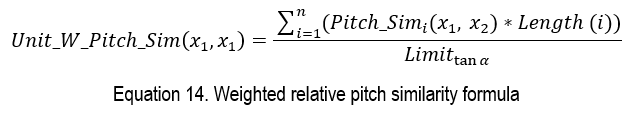

In [17]:
Image("images/weighted_relative_pitch_similarity_formula.png")

In [18]:
def weighted_pitch_similarity(pitch_sim_result, length):
    """
    Calculates the weighted average of pitch similarity scores having the note duration as weights
    """
    return np.sum(pitch_sim_result * length) / np.sum(length)

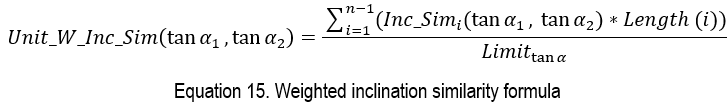

In [19]:
Image("images/weighted_inclination_similarity_formula.png")

In [20]:
def weighted_inclination_similarity(inclination_sim_result, length):
    """
    Calculates the weighted average of pitch similarity scores having the note duration as weights
    """
    return np.sum(inclination_sim_result * length[:-1]) / np.sum(length[:-1])

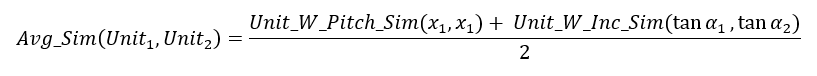

In [21]:
Image("images/average_result_weighted_similarity_formula.png")

In [22]:
def average_similarity(weighted_pitch_sim_result, weighted_inclination_sim_result):
    return (weighted_pitch_sim_result + weighted_inclination_sim_result) / 2

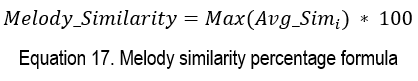

In [23]:
Image("images/melody_percentage_similarity_formula.png")

In [24]:
def melody_similarity(average_similarity_results):
    max_similarity_value = 0
    max_similarity_index = 0
    for index, similarity_value in enumerate(average_similarity_results):
        if max_similarity_value < similarity_value:
            max_similarity_index = index
            max_similarity_value = similarity_value
    return max_similarity_index, max_similarity_value

In [25]:
def get_melody_similarity(melody1, melody2):
    length_difference = len(melody1) - len(melody2)
    similarity_values = []
    similarity_values_details = []
    for i in range(length_difference + 1):
        # separate melody features
        melody_a, durations_a = pitch_note_split(melody1[i:i + len(melody2)])
        melody_b, durations_b = pitch_note_split(melody2)

        # get relative pitch melody
        relative_melody_a = transform_relative_pitch(melody_a)
        relative_melody_b = transform_relative_pitch(melody_b)

        # get comparative line inclinations
        inclination_melody_a = relationship_comparative_line(relative_melody_a, durations_a)
        inclination_melody_b = relationship_comparative_line(relative_melody_b, durations_b)

        # get the limiting values (Relative pitch limit & Inclination limit)
        pitch_diff_limit = pitch_difference_limit(relative_melody_a, relative_melody_b)
        inclination_diff_limit = inclination_difference_limit(inclination_melody_a, inclination_melody_b)

        # get similarity values
        pitch_similarity_result = pitch_similarity(relative_melody_a, relative_melody_b, pitch_diff_limit)
        inclination_similarity_result = inclination_similarity(inclination_melody_a, inclination_melody_b,
                                                               inclination_diff_limit)

        # get the weighted similarity values
        weighted_pitch_similarity_result = weighted_pitch_similarity(pitch_similarity_result, durations_a)
        weighted_inclination_similarity_result = weighted_inclination_similarity(inclination_similarity_result,
                                                                                 durations_a)

        # get the combined/averaged similarity value
        similarity_percentage = average_similarity(weighted_pitch_similarity_result,
                                                   weighted_inclination_similarity_result)

        similarity_values_details.append(
            {"rma": relative_melody_a, "rmb": relative_melody_b, "da": durations_a, "db": durations_b})

        similarity_values.append(similarity_percentage)

    melody_index, melody_similarity_value = melody_similarity(similarity_values)
    visualize_melody(similarity_values_details[melody_index], melody_index, melody_similarity_value)


def visualize_melody(similarity_detail, melody_index, similarity_percentage):
    relative_melody_a = similarity_detail['rma']
    relative_melody_b = similarity_detail['rmb']
    durations_a = similarity_detail['da']
    durations_b = similarity_detail['db']

    timestep_1 = [0]

    for index, duration in enumerate(durations_a[:-1]):
        timestep_1.append(timestep_1[index] + duration)

    timestep_2 = [0]

    for index, duration in enumerate(durations_b[:-1]):
        timestep_2.append(timestep_2[index] + duration)

    fig, ax1 = plt.subplots(figsize=(16, 5))
    graph_1 = ax1.plot(timestep_1, relative_melody_a, marker='s', linestyle='--', color='b', label='Melody A')
    ax1.set_xlabel('time step')
    ax1.set_ylabel('relative pitch')

    ax2 = ax1.twiny()
    graph_2 = ax2.plot(timestep_2, relative_melody_b, marker='s', linestyle='--', color='r', label='Melody B')

    graphs = graph_1 + graph_2
    labels = [graph.get_label() for graph in graphs]
    plt.legend(graphs, labels)
    plt.title("Similarity: " + r"$\bf{" + str(round(similarity_percentage * 100, 2)) + "}$%")
    plt.show()
    fig.savefig("results/output.png")


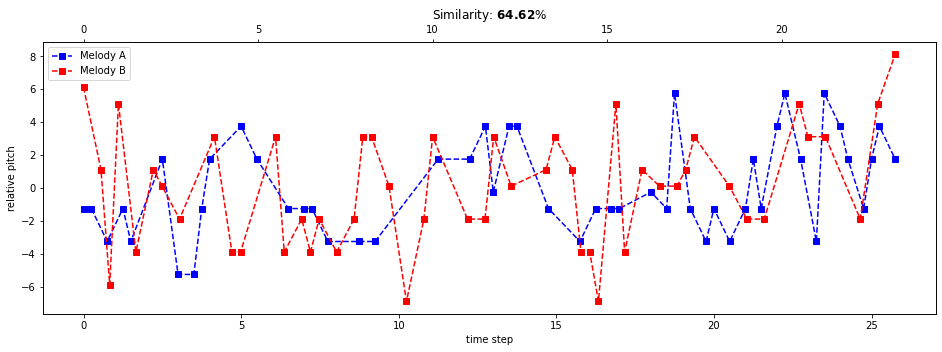

In [26]:
melody_1 = [74, 73, 63, 74, 62, 88, 53, 54, 74, 87, 98, 87, 73, 74, 73, 62, 63, 61, 87, 88, 99, 78, 99, 97, 72, 63, 73,
            74, 72, 78, 74, 108, 73, 64, 73, 63, 74, 89, 73, 99, 108, 88, 64, 108, 99, 88, 74, 89, 98, 89]

melody_2 = [63, 48, 63, 58, 14, 38, 37, 73, 74, 59, 62, 49, 49, 38, 48, 83, 49, 72, 28, 48, 73, 59, 48, 73, 38, 48, 63,
            48, 48, 39, 83, 28, 63, 73, 73, 64, 3, 58, 49, 63, 48, 13, 4, 49, 49, 3, 73, 58, 2, 58]
get_melody_similarity(melody_1, melody_2)